In [ ]:
# Instead relys on the randomness of epsilon, ubc uses hysteric prob p_j = p_ave + sqrt(2*np.log(num_plays) / (num_nj_plays))
# eventually n_j is getting to the order of N, resulting p_ave. but takes arg_max. Otherwise it will never converge
# still random in rewards

In [32]:
import numpy as np
import matplotlib.pyplot as plt

Num_try = 500000

Bandit_prob = [0.2,0.5,0.75]

In [33]:
class Bandit():
    def __init__(self,p): # p:winning rate- pretend not to know what these are
        self.p = p
        self.p_estimate = 0
        self.N = 0
        
    def pull(self): # return a 1 with p
        return np.random.random() < self.p # random takes [0,1] randomly
    
    def update(self, x):
        self.N +=1
        self.p_estimate = (1/self.N)*(x + self.p_estimate*(self.N-1))
        # Using the formula below
        # <p>_n*N = p_n(=x) + <p>_(n-1)*(N-1)
        
        
def ucb1(mean, n ,nj):
    res = mean + np.sqrt(2*np.log(n) / nj)
    return res
        
def experiment():
    bandits = [Bandit(p) for p in Bandit_prob] # we don't know what are in Bandit_prob 
    rewards = np.zeros(Num_try)
    num_plays = 0

    # Initialzation: play once
    for i in range(len(bandits)):
        x = bandits[i].pull()
        num_plays +=1
        bandits[i].update(x)
        
    for j in range(Num_try):
        ind = np.argmax([ucb1(k.p_estimate, num_plays, k.N) for k in bandits])
        x = bandits[ind].pull()
        num_plays += 1
        bandits[ind].update(x)
        
        rewards[j] = x
        
    cum_ave = np.cumsum(rewards) / (np.arange(Num_try) +1)
        
    return bandits, rewards, cum_ave
        
        

In [34]:
bandits, rewards, cum_ave = experiment()

In [35]:
for b in bandits:
    print("mean_estimate",b.p_estimate)
    
print("total_reward", rewards.sum())
print("overall_rate",rewards.sum() / Num_try)

max_p_ind = np.argmax([k.p_estimate for k in bandits])
print("max_p_ind: ",max_p_ind)

mean_estimate 0.20689655172413776
mean_estimate 0.508158508158508
mean_estimate 0.749370854496744
total_reward 374537.0
overall_rate 0.749074
max_p_ind:  2


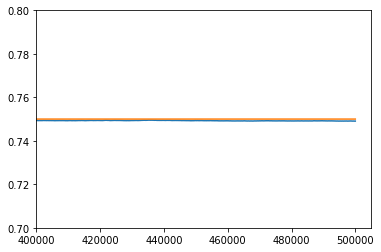

In [36]:
cum_rewards = np.cumsum(rewards)
win_rates = cum_rewards / (np.arange(Num_try) + 1)
plt.plot(win_rates)
plt.plot(np.ones(Num_try)*np.max(Bandit_prob))
plt.xlim(Num_try*0.8,Num_try*1.01)
plt.ylim(0.7,0.8)
plt.show()

